# Math 42 Final Project
Finding out if there is a correlation between the amount of money the team has vs. the number of wins over the regular season.

There are 82 Regular Season games and success is determined by number of wins

Money is going to be compared by the payroll of the players & networth of the team

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [23]:
individual_salaries = pd.read_csv("team_salaries.csv")
all_team_stats = pd.read_csv("team_stats.csv")

# Data Cleaning

## Groupby team_salaries Data

In [36]:
team_salaries = individual_salaries.groupby("TEAM-SEASON").agg({"Salary" : ["sum", "mean", "median", "std"]})
team_salaries.columns = ["Total_Salary", "Mean_Salary", "Median_Salary", "STD_Salary"]
team_salaries = team_salaries.reset_index()
team_salaries.columns = ["Team_Season", "Total_Salary", "Mean_Salary", "Median_Salary", "STD_Salary"]
team_salaries.head()

,Team_Season,Total_Salary,Mean_Salary,Median_Salary,STD_Salary
0,ATL-2003,54529000,4.957182e+06,2775000.0,4.098792e+06
1,ATL-2004,15724000,3.931000e+06,2966500.0,2.533275e+06
2,ATL-2005,10899000,3.633000e+06,3150000.0,1.015636e+06
3,ATL-2006,38198405,3.183200e+06,2118600.0,3.393676e+06
4,ATL-2007,57828414,3.855228e+06,2952840.0,4.021062e+06


## Add Team_season variable to team_stats

In [37]:
team_stats = all_team_stats[["team", "season", "abbreviation", "w", "playoffs"]]
team_stats = team_stats[ (team_stats["season"] >= 2003) & (team_stats["season"] <= 2019) ]
team_stats["Team_Season"] = team_stats.apply(lambda row: str(row.abbreviation) + "-" + str(row.season), axis=1)
team_stats.head()

,team,season,abbreviation,w,playoffs,Team_Season
124,Atlanta Hawks,2019,ATL,29.0,False,ATL-2019
125,Boston Celtics,2019,BOS,49.0,True,BOS-2019
126,Brooklyn Nets,2019,BRK,42.0,True,BRK-2019
127,Chicago Bulls,2019,CHI,22.0,False,CHI-2019
128,Charlotte Hornets,2019,CHO,39.0,False,CHO-2019


## Combine Data

In [38]:
data = pd.merge(team_stats, team_salaries, on="Team_Season")

,team,season,abbreviation,w,playoffs,Team_Season,Total_Salary,Mean_Salary,Median_Salary,STD_Salary
0,Atlanta Hawks,2019,ATL,29.0,False,ATL-2019,66443526,3.691307e+06,1942800.0,4.693193e+06
1,Boston Celtics,2019,BOS,49.0,True,BOS-2019,154255448,9.640966e+06,5181780.0,1.111157e+07
2,Chicago Bulls,2019,CHI,22.0,False,CHI-2019,80706074,5.044130e+06,2167728.0,5.568329e+06
3,Cleveland Cavaliers,2019,CLE,19.0,False,CLE-2019,112729947,8.671534e+06,3263294.0,8.748628e+06
4,Dallas Mavericks,2019,DAL,33.0,False,DAL-2019,49309106,4.109092e+06,2627900.5,3.694928e+06


## Add Variables

In [48]:
# Adding the Salary Cap Variable
salary_cap_conditions = [ 
    (data["season"] == 2019),
    (data["season"] == 2018),
    (data["season"] == 2017),
    (data["season"] == 2016),
    (data["season"] == 2015),
    (data["season"] == 2014),
    (data["season"] == 2013),
    (data["season"] == 2012),
    (data["season"] == 2011),
    (data["season"] == 2010),
    (data["season"] == 2009),
    (data["season"] == 2008),
    (data["season"] == 2007),
    (data["season"] == 2006),
    (data["season"] == 2005),
    (data["season"] == 2004),
    (data["season"] == 2003)
]
salary_cap_labels = [109140000, 101869000, 99093000, 94143000, 70000000, 
                     63065000, 58697000, 58044000, 58044000, 58040000, 
                     57700000, 58680000, 55630000, 53135000, 49500000, 
                     43870000, 43840000] 
data["Salary_Cap"] = np.select(salary_cap_conditions, salary_cap_labels)

data["Above_Salary_Cap"] = (data["Total_Salary"] - data["Salary_Cap"]) / data["Salary_Cap"]

In [65]:
# Adding percent of salary Variable
all_team_salaries = data.groupby("season")["Total_Salary"].sum()
all_team_salaries = all_team_salaries.reset_index()
all_team_salaries.columns = ["season", "Season_Salary"]
data = pd.merge(data, all_team_salaries, on="season")

data["Percent_League_Salary"] = data["Total_Salary"] / data["Season_Salary"]

In [66]:
data = data.dropna()
data.head()

,team,season,abbreviation,w,playoffs,Team_Season,Total_Salary,Mean_Salary,Median_Salary,STD_Salary,Salary_Cap,Above_Salary_Cap,Season_Salary_x,Season_Salary_y,Season_Salary,Percent_League_Salary
0,Atlanta Hawks,2019,ATL,29.0,False,ATL-2019,66443526,3.691307e+06,1942800.0,4.693193e+06,109140000,-0.391208,3599744086,3599744086,3599744086,0.018458
1,Boston Celtics,2019,BOS,49.0,True,BOS-2019,154255448,9.640966e+06,5181780.0,1.111157e+07,109140000,0.413372,3599744086,3599744086,3599744086,0.042852
2,Chicago Bulls,2019,CHI,22.0,False,CHI-2019,80706074,5.044130e+06,2167728.0,5.568329e+06,109140000,-0.260527,3599744086,3599744086,3599744086,0.022420
3,Cleveland Cavaliers,2019,CLE,19.0,False,CLE-2019,112729947,8.671534e+06,3263294.0,8.748628e+06,109140000,0.032893,3599744086,3599744086,3599744086,0.031316
4,Dallas Mavericks,2019,DAL,33.0,False,DAL-2019,49309106,4.109092e+06,2627900.5,3.694928e+06,109140000,-0.548203,3599744086,3599744086,3599744086,0.013698


In [63]:
data.to_csv("salaries_team_data.csv", index = False)

# Compare STD vs. Wins

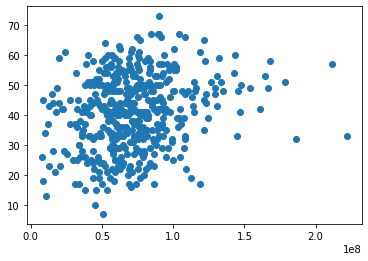

In [44]:
plt.scatter(data.Total_Salary, data.w)

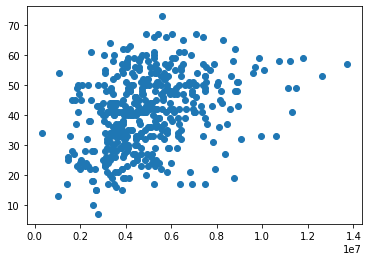

In [43]:
plt.scatter(data.STD_Salary, data.w)

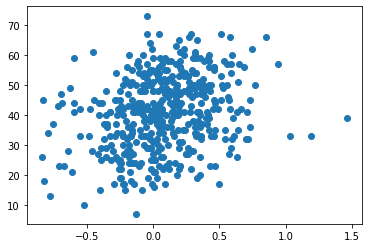

In [52]:
plt.scatter(data.Above_Salary_Cap, data.w)

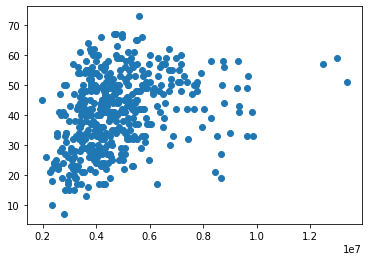

In [45]:
plt.scatter(data.Mean_Salary, data.w)

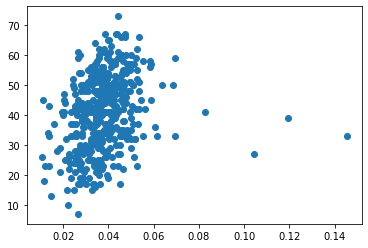

In [67]:
plt.scatter(data.Percent_League_Salary, data.w)

# Fitting Curve

In [70]:
from numpy import array, exp
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt 

In [88]:
def func1(x, a, b, c):
    return a*x**2+b*x+c
data = data.sort_values(by = "Mean_Salary")

params, covs = curve_fit(func1, data.Mean_Salary, data.w)

In [89]:
print("params: ", params) 
print("covariance: ", covs) 

params, _ = curve_fit(func1, data.Mean_Salary, data.w)
a, b, c = params[0], params[1], params[2]
yfit1 = a*data.Mean_Salary**2+b*data.Mean_Salary+c

params:  [-5.03963480e-13  8.60202898e-06  1.26971755e+01]
covariance:  [[ 1.16095052e-26 -1.41604815e-19  3.79495459e-13]
 [-1.41604815e-19  1.83493250e-12 -5.14244822e-06]
 [ 3.79495459e-13 -5.14244822e-06  1.51482494e+01]]


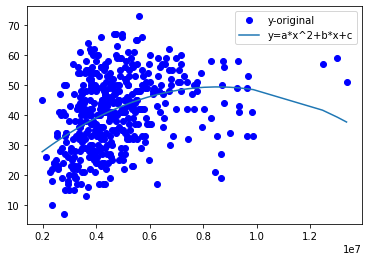

In [92]:
plt.plot(data.Mean_Salary, data.w, 'bo', label="y-original")
plt.plot(data.Mean_Salary, yfit1, label="y=a*x^2+b*x+c")
plt.legend()
plt.show()

C:\Users\derek\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


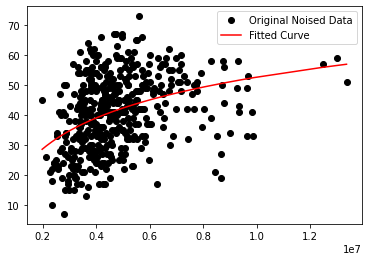

In [103]:
def func(x, a, b, c):
  #return a * np.exp(-b * x) + c
  return a * np.log(b * x) + c

popt, pcov = curve_fit(func, data.Mean_Salary, data.w)
plt.figure()
plt.plot(data.Mean_Salary, data.w, 'ko', label="Original Noised Data")
plt.plot(data.Mean_Salary, func(data.Mean_Salary, *popt), 'r-', label="Fitted Curve")
plt.legend()
plt.show()

# Machine Learning

In [93]:
from sklearn import linear_model
import statsmodels.api as sm

In [111]:
def func(x, a, b, c):
  #return a * np.exp(-b * x) + c
  return a * np.log(b * x) + c
popt, pcov = curve_fit(func, data.Mean_Salary, data.w)


x = data[["Mean_Salary"]]
y = func(data.Mean_Salary, *popt)
regr = linear_model.LinearRegression()
regr.fit(x, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
x = sm.add_constant(x) # adding a constant
 
model = sm.OLS(y, x).fit()
#predictions = model.predict(this_season) 
 
print_model = model.summary()
print(print_model)

[ 1.48846238e+01  1.52230978e-04 -5.64066395e+01]
[[ 3.02984136e+00  5.92925130e+00 -5.78580111e+05]
 [ 5.92924416e+00  1.77069173e+04 -1.72779314e+09]
 [-5.78579415e+05 -1.72779314e+09  1.68593384e+14]]
Intercept: 
 27.810487089446006
Coefficients: 
 [2.74037194e-06]
                            OLS Regression Results                            
Dep. Variable:            Mean_Salary   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     7561.
Date:                Mon, 28 Nov 2022   Prob (F-statistic):          3.16e-282
Time:                        16:00:20   Log-Likelihood:                -680.56
No. Observations:                 449   AIC:                             1365.
Df Residuals:                     447   BIC:                             1373.
Df Model:                           1                                         
Covariance Type:    

C:\Users\derek\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [109]:
params, _ = curve_fit(func1, data.Mean_Salary, data.w)
a, b, c = params[0], params[1], params[2]
yfit1 = a*data.Mean_Salary**2+b*data.Mean_Salary+c

print("a = " + str(a) + ",  b = " + str(b) + ", c = " + str(c))

x = data[["Mean_Salary"]]
y = yfit1

regr = linear_model.LinearRegression()
regr.fit(x, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
x = sm.add_constant(x) # adding a constant
 
model = sm.OLS(y, x).fit()
#predictions = model.predict(this_season) 
 
print_model = model.summary()
print(print_model)

a = -5.039634802522792e-13,  b = 8.6020289770133e-06, c = 12.697175532322944
Intercept: 
 29.170905238798756
Coefficients: 
 [2.45502672e-06]
                            OLS Regression Results                            
Dep. Variable:            Mean_Salary   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     1143.
Date:                Mon, 28 Nov 2022   Prob (F-statistic):          2.97e-125
Time:                        15:46:31   Log-Likelihood:                -1055.3
No. Observations:                 449   AIC:                             2115.
Df Residuals:                     447   BIC:                             2123.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025 

# Machine Learning 2

C:\Users\derek\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


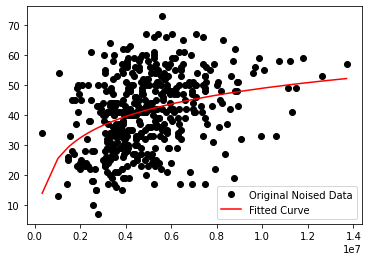

In [114]:
def func(x, a, b, c):
  #return a * np.exp(-b * x) + c
  return a * np.log(b * x) + c

data = data.sort_values(by = "STD_Salary")
popt, pcov = curve_fit(func, data.STD_Salary, data.w)
plt.figure()
plt.plot(data.STD_Salary, data.w, 'ko', label="Original Noised Data")
plt.plot(data.STD_Salary, func(data.STD_Salary, *popt), 'r-', label="Fitted Curve")
plt.legend()
plt.show()

In [115]:
def func(x, a, b, c):
  #return a * np.exp(-b * x) + c
  return a * np.log(b * x) + c
popt, pcov = curve_fit(func, data.STD_Salary, data.w)


x = data[["Mean_Salary"]]
y = func(data.STD_Salary, *popt)
regr = linear_model.LinearRegression()
regr.fit(x, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
x = sm.add_constant(x) # adding a constant
 
model = sm.OLS(y, x).fit()
#predictions = model.predict(this_season) 
 
print_model = model.summary()
print(print_model)

C:\Users\derek\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Intercept: 
 32.526258755632824
Coefficients: 
 [1.75116254e-06]
                            OLS Regression Results                            
Dep. Variable:             STD_Salary   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.445
Method:                 Least Squares   F-statistic:                     360.7
Date:                Mon, 28 Nov 2022   Prob (F-statistic):           2.09e-59
Time:                        16:05:36   Log-Likelihood:                -1162.6
No. Observations:                 449   AIC:                             2329.
Df Residuals:                     447   BIC:                             2337.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

# Original Data Sets

In [25]:
all_team_stats.head()

,season,lg,team,abbreviation,playoffs,age,w,l,pw,pl,...,tov_percent,orb_percent,ft_fga,opp_e_fg_percent,opp_tov_percent,opp_drb_percent,opp_ft_fga,arena,attend,attend_g
0,2023,NBA,Atlanta Hawks,ATL,False,25.5,4.0,3.0,3.0,4.0,...,11.1,22.4,0.194,0.525,11.5,72.2,0.250,State Farm Arena,53083.0,17694.0
1,2023,NBA,Boston Celtics,BOS,False,27.6,4.0,2.0,3.0,3.0,...,12.7,19.1,0.226,0.532,10.8,74.9,0.212,TD Garden,57468.0,19156.0
2,2023,NBA,Brooklyn Nets,BRK,False,28.8,2.0,5.0,2.0,5.0,...,12.6,21.3,0.250,0.556,13.4,70.2,0.224,Barclays Center,87276.0,17455.0
3,2023,NBA,Chicago Bulls,CHI,False,28.0,3.0,4.0,3.0,4.0,...,12.7,24.6,0.269,0.564,15.9,79.9,0.201,United Center,76078.0,19020.0
4,2023,NBA,Charlotte Hornets,CHO,False,26.2,3.0,4.0,4.0,3.0,...,12.5,24.4,0.184,0.512,12.1,74.8,0.222,Spectrum Center,50386.0,16795.0


In [26]:
individual_salaries.head()

,Player,Team,Salary,Season,Abb,TEAM-SEASON
0,Shaquille O'Neal,Los Angeles Lakers,23571000,2003,LAL,LAL-2003
1,Juwan Howard,Denver Nuggets,20625000,2003,DEN,DEN-2003
2,Karl Malone,Utah Jazz,19250000,2003,UTA,UTA-2003
3,Dikembe Mutombo,New Jersey Nets,16105000,2003,BKN,BKN-2003
4,Damon Stoudamire,Portland Trail Blazers,13500000,2003,POR,POR-2003
